# Projekt 2
#### Bartosz Eljasiak, Mateusz Grzyb, Mariusz Słapek

## Zbiór danych

Nazwa: Online Shoppers Purchasing Intention Dataset

Autorzy: C. Okan Sakar, Yomi Kastro

Źródło: https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset#

Opis: 
> The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

## Wczytanie pakietów

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from pandas_profiling import ProfileReport

## Wczytanie danych

In [2]:
data=pd.read_csv('../data/online_shoppers_intention.csv')

data

Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000   
2                         0.0               1                 0.000000   
3                         0.0               2                 2.666667   
4                         0.0              10               627.500000   
...                       ...             ...                      ...   
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.200000   0.200000    0.000000         0.0   Feb                 1   
1         0.000000   0.100000    0.000000         0.0   Feb                 2   
2         0.200000   0.200000    0.000000         0.0   Feb                 4   
3         0.050000   0.140000    0.000000         0.0   Feb                 3   
4         0.020000   0.050000    0.000000         0.0   Feb                 3   
...            ...        ...         ...         ...   ...               ...   
12325     0.007143   0.029031   12.241717         0.0   Dec                 4   
12326     0.000000   0.021333    0.000000         0.0   Nov                 3   
12327     0.083333   0.086667    0.000000         0.0   Nov                 3   
12328     0.000000   0.021053    0.000000         0.0   Nov                 2   
12329     0.000000   0.066667    0.000000         0.0   Nov                 3   

       Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0            1       1            1  Returning_Visitor    False    False  
1            2       1            2  Returning_Visitor    False    False  
2            1       9            3  Returning_Visitor    False    False  
3            2       2            4  Returning_Visitor    False    False  
4            3       1            4  Returning_Visitor     True    False  
...        ...     ...          ...                ...      ...      ...  
12325        6       1            1  Returning_Visitor     True    False  
12326        2       1            8  Returning_Visitor     True    False  
12327        2       1           13  Returning_Visitor     True    False  
12328        2       3           11  Returning_Visitor    False    False  
12329        2       1            2        New_Visitor     True    False  

[12330 rows x 18 columns]

In [ ]:
dat = pd.DataFrame(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'], as)

In [ ]:
dat

In [6]:
## Opis zmiennych

> The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.
>
>
> "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

oraz

> ### CONTINUOS FEATURES
> 
> #### Administrative - number of different pages visited related to the administrative concerns of the website
> 
> #### Informational - number of different pages visited related to the information of the website and other useful contents of the website
>
> #### ProductRelated - number of different pages visited related to different products of the website.
>
> #### BounceRate - Percentage of users who left the website from the landing page
>
> #### ExitRate  - Percentage of users who left from the page the visit
>
> #### Page Values - Page Value is the average value for a page that a user visited before making a transaction.
>
> #### SpecialDay 
>
> * 0 – day of the session is not within 10 days of a special day.
> * Between 0.1 and 0.5 – day of the session is between 10 days and 5 days away from a special day.
> * Between 0.6 and 0.9 – day of the session is between 4 days and 1 day away from a special day.
> * 1 – day of the session is a special day. 
>
> The features Bounce Rates, Exit Rates and Page Values are terms of Google analytics that are used to determine the performance of a website. The bounce rate is used to show the percentage of single page sessions out of all the sessions. The exit rate shows us the percentage of people who left from a page. Page value gives us the average value of the transaction to all the pages visited which is equally distributed to all pages.
>
>
> ### CATEGORICAL FEATURES
>
> #### Administrative_Duration
>
> Time spent on Administrative pages in seconds
> * 0 – No time was spent on the page                                 
> * 1 - Less time of under 233 was spent on the page
> * 2 – More time of  over 233 was spent on the page    
>
> #### Informational_duration
>
> Time spent on Informational pages in seconds                         
> * 0 – No time was spent on the page
> * 1- More time was spent on the page    
>
> #### ProductRelated_Duration
>
> Time spent on pages related to products in seconds                 
> * 0 – No time was spent on the page
> * 1 - Less time of under 3384 was spent on the page
> * 2 – More time of  over 3384 was spent on the page 
>
> #### Browse - ID of bowsers from which the session took place
>
> #### Region - ID of Regions from which the session took place
>
> #### Traffic Type - ID of different types of sources from which the users landed on the website
>
> #### User Type - Whether the user is a returning user or a new user or of any other type
>
> #### Revenue  - Whether the user contributed to the revenue by purchasing or not
>
> #### Weekend - Whether the session was on a weekend or not

In [7]:
dat

0
0            Administrative
1   Administrative_Duration
2             Informational
3    Informational_Duration
4            ProductRelated
5   ProductRelated_Duration
6               BounceRates
7                 ExitRates
8                PageValues
9                SpecialDay
10                    Month
11         OperatingSystems
12                  Browser
13                   Region
14              TrafficType
15              VisitorType
16                  Weekend
17                  Revenue

## Opis zmiennych

> The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.
>
>
> "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

oraz

> ### CONTINUOS FEATURES
> 
> #### Administrative - number of different pages visited related to the administrative concerns of the website
> 
> #### Informational - number of different pages visited related to the information of the website and other useful contents of the website
>
> #### ProductRelated - number of different pages visited related to different products of the website.
>
> #### BounceRate - Percentage of users who left the website from the landing page
>
> #### ExitRate  - Percentage of users who left from the page the visit
>
> #### Page Values - Page Value is the average value for a page that a user visited before making a transaction.
>
> #### SpecialDay 
>
> * 0 – day of the session is not within 10 days of a special day.
> * Between 0.1 and 0.5 – day of the session is between 10 days and 5 days away from a special day.
> * Between 0.6 and 0.9 – day of the session is between 4 days and 1 day away from a special day.
> * 1 – day of the session is a special day. 
>
> The features Bounce Rates, Exit Rates and Page Values are terms of Google analytics that are used to determine the performance of a website. The bounce rate is used to show the percentage of single page sessions out of all the sessions. The exit rate shows us the percentage of people who left from a page. Page value gives us the average value of the transaction to all the pages visited which is equally distributed to all pages.
>
>
> ### CATEGORICAL FEATURES
>
> #### Administrative_Duration
>
> Time spent on Administrative pages in seconds
> * 0 – No time was spent on the page                                 
> * 1 - Less time of under 233 was spent on the page
> * 2 – More time of  over 233 was spent on the page    
>
> #### Informational_duration
>
> Time spent on Informational pages in seconds                         
> * 0 – No time was spent on the page
> * 1- More time was spent on the page    
>
> #### ProductRelated_Duration
>
> Time spent on pages related to products in seconds                 
> * 0 – No time was spent on the page
> * 1 - Less time of under 3384 was spent on the page
> * 2 – More time of  over 3384 was spent on the page 
>
> #### Browse - ID of bowsers from which the session took place
>
> #### Region - ID of Regions from which the session took place
>
> #### Traffic Type - ID of different types of sources from which the users landed on the website
>
> #### User Type - Whether the user is a returning user or a new user or of any other type
>
> #### Revenue  - Whether the user contributed to the revenue by purchasing or not
>
> #### Weekend - Whether the session was on a weekend or not

## Typy zmiennych i braki danych

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

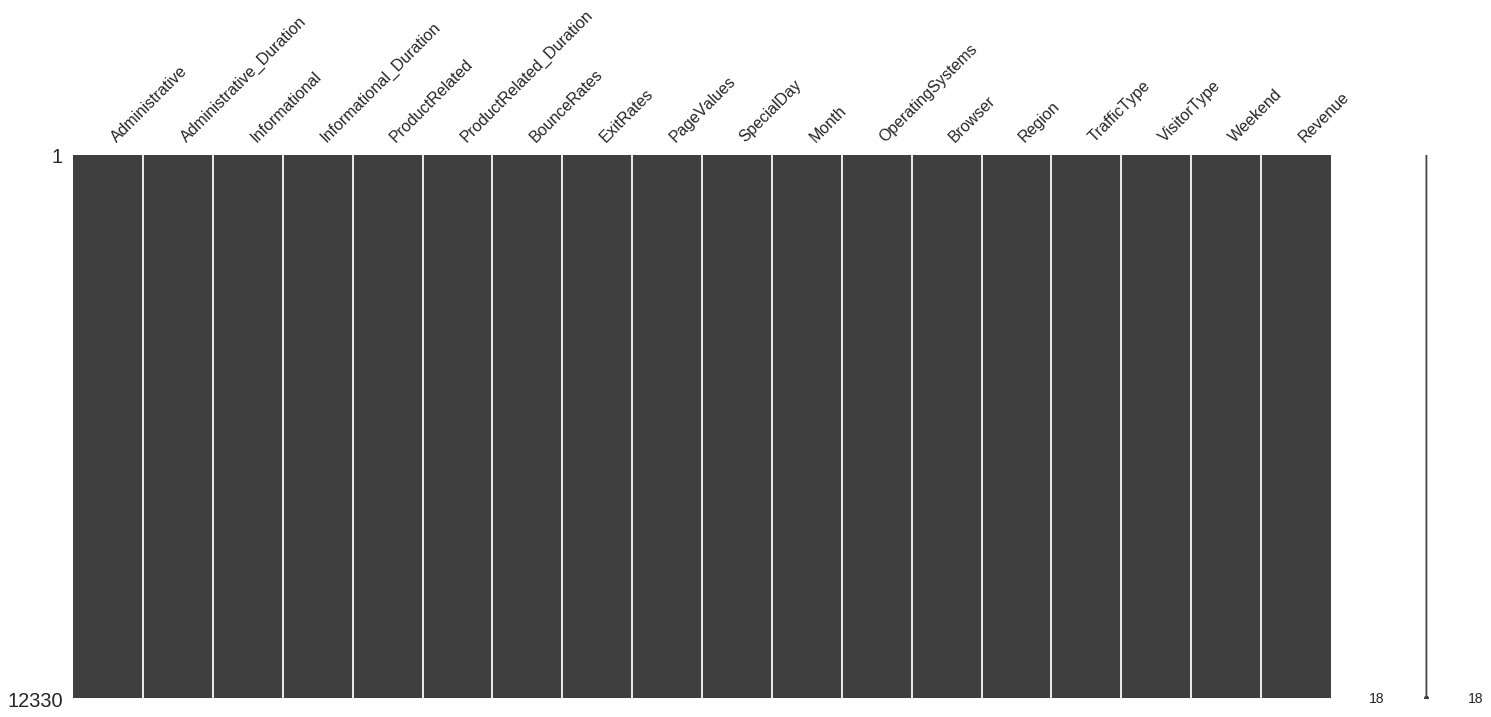

In [30]:
msno.matrix(data);

#### Komentarz
Dane obejmują 12330 sesji. Zmienne są typów bool, int, float i str. Nie występują braki danych.

## Pandas Profiling

In [31]:
profile=ProfileReport(data, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile.to_notebook_iframe()

#### Komentarz

Dosyć ciekawa jest sekcja Warnings, możemy się z niej dowiedzieć, że:

* W danych występuje 125 identycznych wierszy,
* w kolumnach Administrative i Administrative_Duration zera statnowią ~47% danych,
* w kolumnach Informational i Informational_Duration zera stanowią ~79% danych.

## Analiza zmiennych

### Rozkłady zmiennych kategorycznych

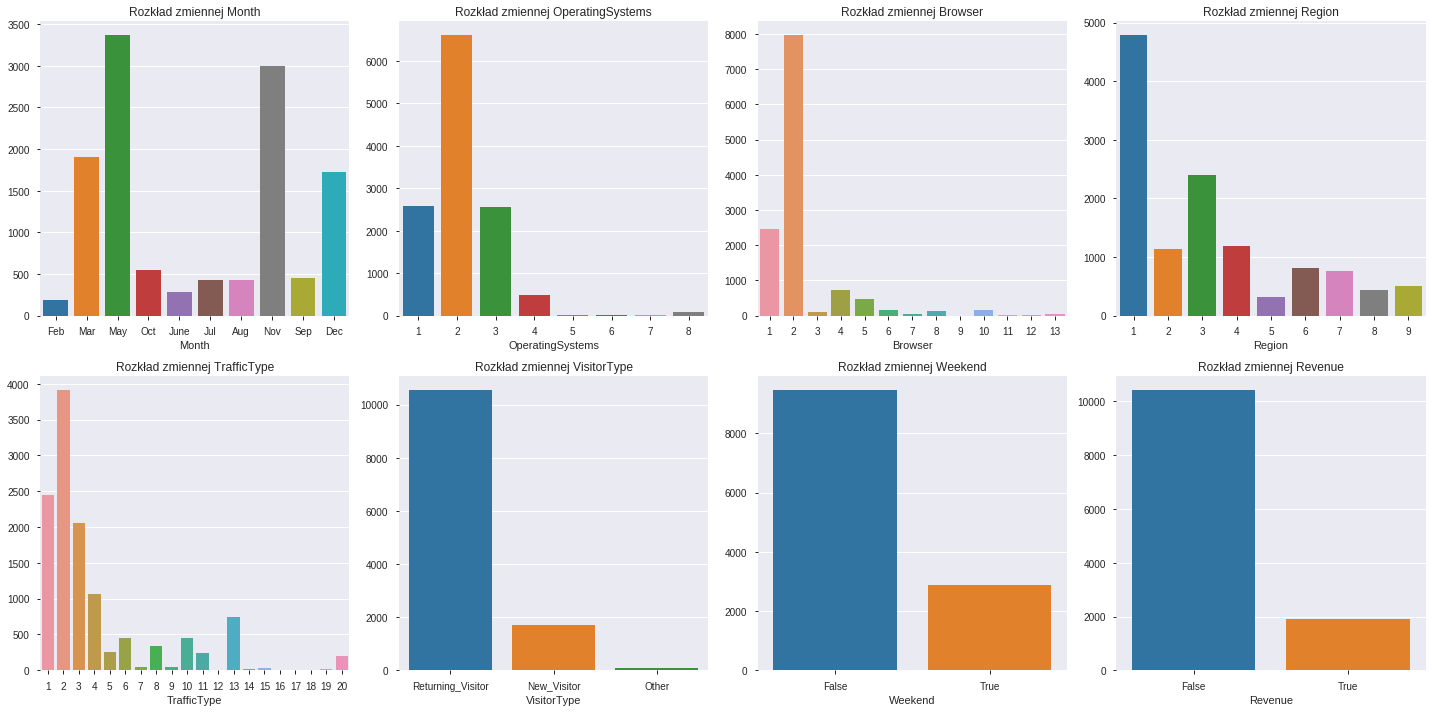

In [32]:
variables=['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

f, axes=plt.subplots(2, 4, figsize=(20, 10))

for i in range(0, len(variables)):
    sns.countplot(data=data, x=variables[i], ax=axes[i//4, i%4]).set_title('Rozkład zmiennej '+variables[i])
for ax in f.axes:
    ax.set_ylabel('')
    
plt.tight_layout();

#### Komentarz

* W danych brakuje sesji z miesięcy styczeń i kwiecień,

* w każdym z rozkładów zmiennych 'OperatingSystems', 'Browser', 'Region' i 'TrafficType' występuje zdecydowany lider pod względem liczności,

* większość odwiedzających to powracający odwiedzający,

* większość sesji odbyła się w dzień roboczy, ale nie brakuje informacji o sesjach odbytych podczas weekendu (dane dość wyrównane biorąc pod uwagę liczbę dni robocznych oraz liczbę dni podczas weekendu)

* większość sesji nie przyniosła dochodu.

### Rozkłady zmiennych numerycznych

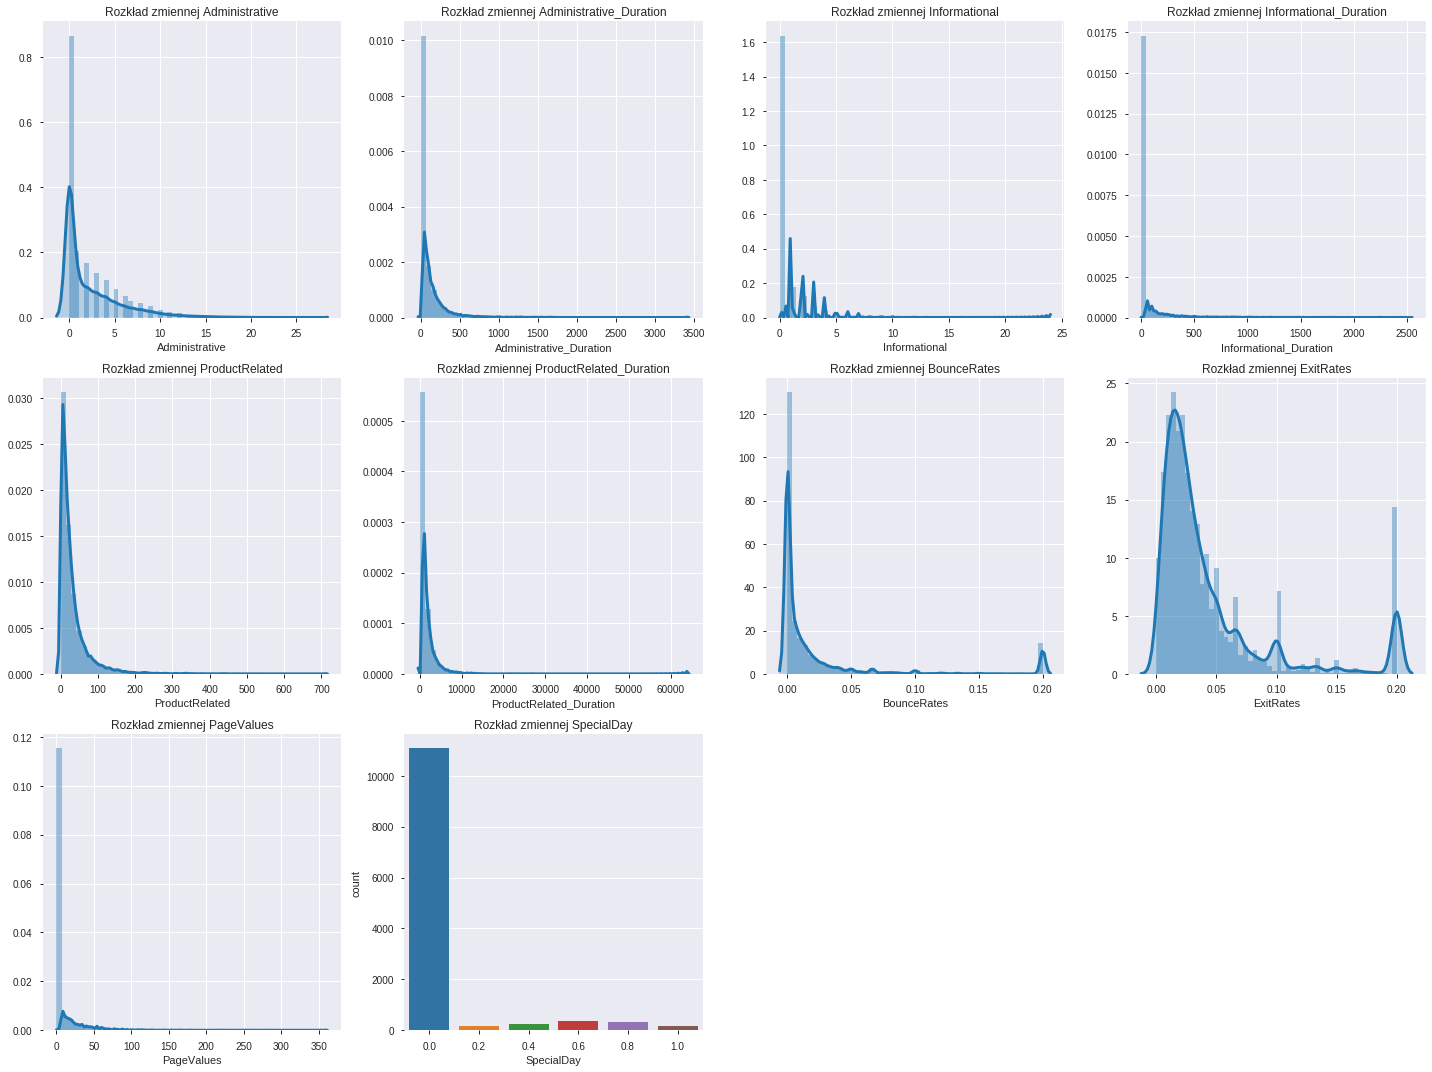

In [33]:
variables=['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
plots=[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

f, axes = plt.subplots(3, 4, figsize=(20, 15))

for i in range(0, len(variables)):
    if(plots[i]==0):
        sns.distplot(data[variables[i]].dropna(), hist=True, kde=True, kde_kws={'shade': True, 'linewidth': 3}, ax=axes[i//4, i%4]).set_title('Rozkład zmiennej '+variables[i])
    else:
        sns.countplot(data=data, x=variables[i], ax=axes[i//4, i%4]).set_title('Rozkład zmiennej '+variables[i])
for i in range(10, 12):
    f.delaxes(axes[i//4, i%4])

plt.tight_layout();

### Statystyki pozycyjne i rozproszenia zmiennych numerycznych

In [34]:
data.loc[:, variables].describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157213   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  
count  12330.000000  12330.000000  12330.000000  12330.000000  
mean       0.022191      0.043073      5.889258      0.061427  
std        0.048488      0.048597     18.568437      0.198917  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.014286      0.000000      0.000000  
50%        0.003112      0.025156      0.000000      0.000000  
75%        0.016813      0.050000      0.000000      0.000000  
max        0.200000      0.200000    361.763742      1.000000

#### Komentarz

* Wszystkie rozkłady wykazują silną dodatnią asymetrię,

* użytkownicy dużo częściej odwiedzają strony związane z produktem, niż strony administracyjne i informacyjne (i spędzają na nich średnio ponad 10 razy więcej czasu),

* rozmieszczenie peaków w zmiennych 'ExitRates' i 'BounceRates' jest podobne (Exit Rate vs. Bounce Rate - https://support.google.com/analytics/answer/2525491?hl=en),

* Page Value - https://support.google.com/analytics/answer/2695658?hl=en

* zmienna SpecialDay, choć numeryczna, przyjmuje wąski zakres wartości,

* zdecydowana większość sesji nie jest powiązana z żadnym dniem specjalnym.

## Korelacje zmiennych

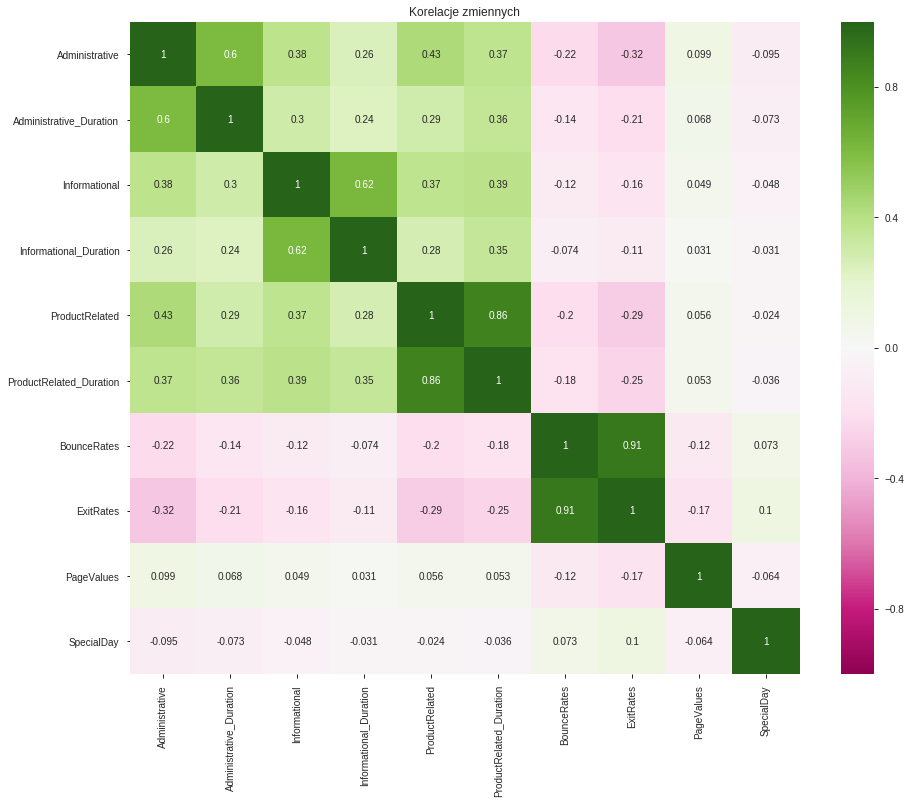

In [35]:
corr=data.loc[:, variables].corr()
fig, ax=plt.subplots(figsize=(15, 12))  
ax=sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap="PiYG", center=0, vmin=-1, vmax=1)
ax.set_title('Korelacje zmiennych')
plt.show();

#### Komentarz

* ilość stron danego typu, jaką odwiedził użytkownik, jest dodatnio skorelowana z ilością czasu, jaki na nich spędził (wartości 0.6-0.86),

* wskaźniki Exit Rate i Bounce Rate są wysoce dodatnio skorelowane (wartość 0.91).

W opisie zmiennych przeczytać możemy:

> The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.

W związku z tym, opisaną powyżej wysoką dodatnią korelację można prawdopodbnie interpretować w następujący sposób: **bardzo często strona, na której użytkownik nie podejmie żadnej akcji, jest ostatnią stroną w sesji użytkownika.**

## Analiza wielowymiarowa

Poniższe analizy są analizami poglądowymi, a wnioski z nich dotyczą przede wszystkim badanego zbioru danych. Choć opis zbioru mówi nam
    
> The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

, to jego rozmiar nie jest wystarczający do wyciągania prawdziwie ogólnych wniosków.

### Czy użytkownicy średnio odwiedzają więcej stron i spędzają na nich więcej czasu w trakcie weekendu? Jak weekend wpływa na odsetek sesji zakończonych przychodem?

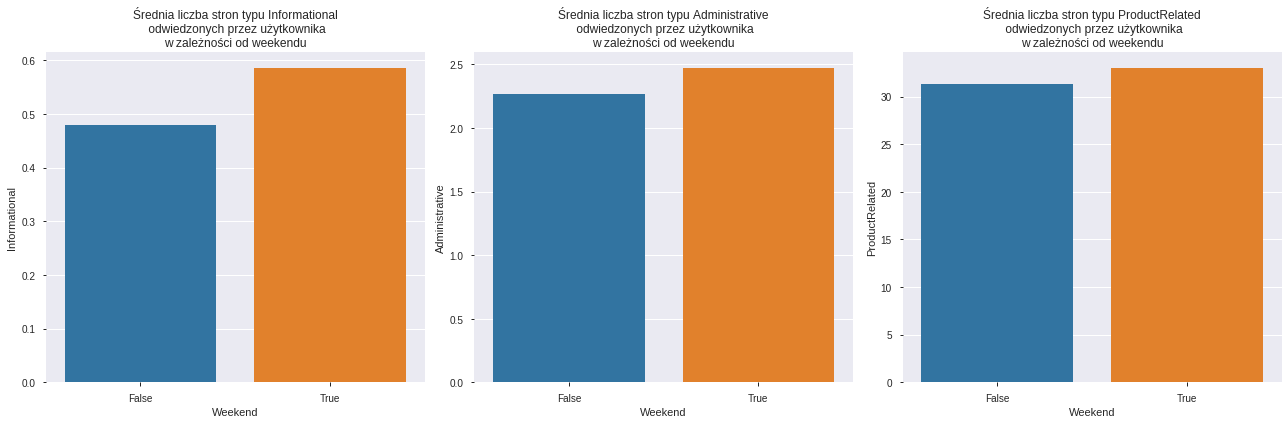

In [36]:
variables=['Informational', 'Administrative', 'ProductRelated']

f, axes=plt.subplots(1, 3, figsize=(18, 6))

for i in range(0, len(variables)):
    plotdata=data.loc[:, [variables[i], 'Weekend']].groupby('Weekend').mean().reset_index()
    sns.barplot(data=plotdata, x='Weekend', y=variables[i], ax=axes[i%3]).set_title('Średnia liczba stron typu '+variables[i]+'\n odwiedzonych przez użytkownika'+'\nw zależności od weekendu')

plt.tight_layout();

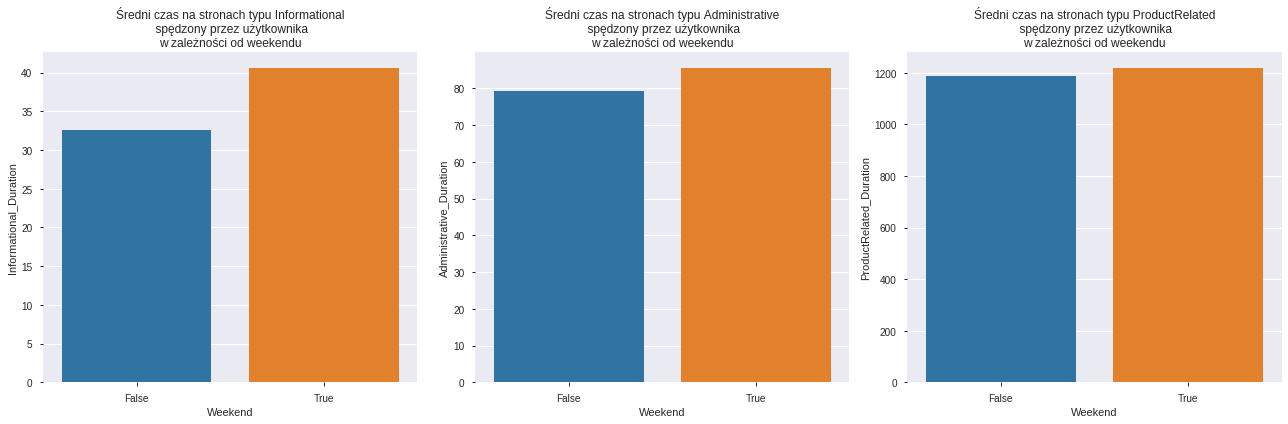

In [37]:
variables=['Informational', 'Administrative', 'ProductRelated']

f, axes=plt.subplots(1, 3, figsize=(18, 6))

for i in range(0, len(variables)):
    plotdata=data.loc[:, [variables[i]+'_Duration', 'Weekend']].groupby('Weekend').mean().reset_index()
    sns.barplot(data=plotdata, x='Weekend', y=variables[i]+'_Duration', ax=axes[i%3]).set_title('Średni czas na stronach typu '+variables[i]+'\n spędzony przez użytkownika'+'\nw zależności od weekendu')

plt.tight_layout();

#### Komentarz

Tak, użytkownicy średnio odwiedzają nieco więcej stron każdego rodzaju i spędzają na nich nieco więcej czasu w trakcie weekendu.

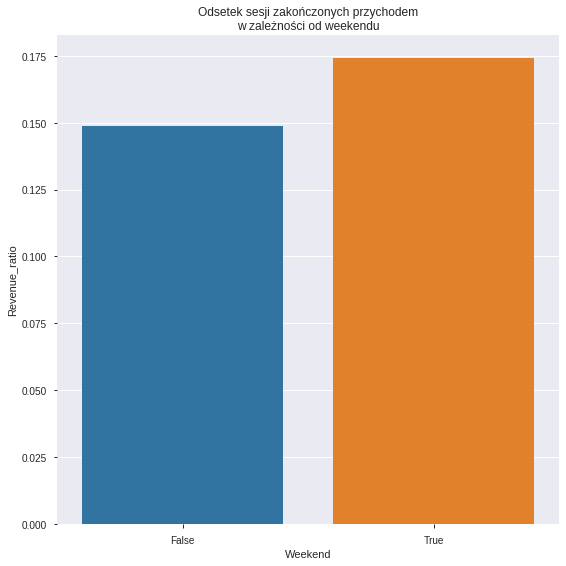

In [38]:
plotdata=data.loc[:, ['Weekend', 'Revenue']].groupby(['Weekend', 'Revenue']).size().reset_index(name='counts')
plotdata_sums=plotdata.loc[:, ['Weekend', 'counts']].groupby('Weekend').sum().reset_index().rename(columns={'counts':'sum'})
plotdata=plotdata.merge(plotdata_sums)
plotdata=plotdata[plotdata['Revenue']==True]
plotdata['Revenue_ratio']=plotdata['counts']/plotdata['sum']

fig, ax=plt.subplots(figsize=(9, 9))  
ax=sns.barplot(data=plotdata, x='Weekend', y='Revenue_ratio').set_title('Odsetek sesji zakończonych przychodem'+'\nw zależności od weekendu');
plt.show()

#### Komentarz

W trakcie weekendu odsetek sesji zakończonych dochodem jest nieco większy.

### Jak bliskość dnia specjalnego wpływa na średnią ilość stron danego rodzaju odwiedzanych przez użytkownika? Jak wpływa na odsetek sesji zakończonych przychodem?

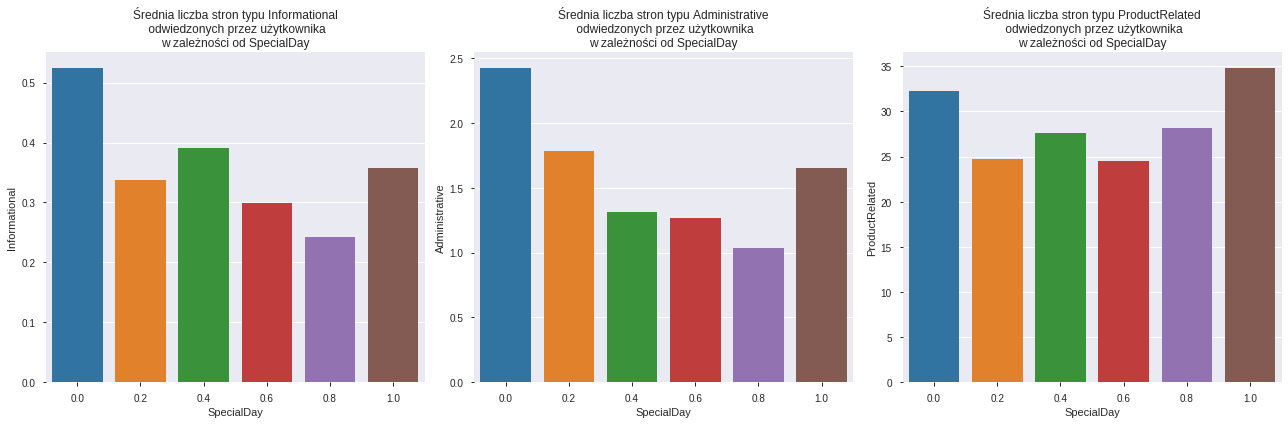

In [39]:
variables=['Informational', 'Administrative', 'ProductRelated']

f, axes=plt.subplots(1, 3, figsize=(18, 6))

for i in range(0, len(variables)):
    plotdata=data.loc[:, [variables[i], 'SpecialDay']].groupby('SpecialDay').mean().reset_index()
    sns.barplot(data=plotdata, x='SpecialDay', y=variables[i], ax=axes[i%3]).set_title('Średnia liczba stron typu '+variables[i]+'\n odwiedzonych przez użytkownika'+'\nw zależności od SpecialDay')

plt.tight_layout();

#### Komentarz

W pobliżu dni specjalnych użytkownicy odwiedzają średnio mniej stron informacyjnych i administracyjnych oraz średnio nieco więcej stron związanych z produktami, w czasie sesji, w porównaniu do dni zwyczajnych. 

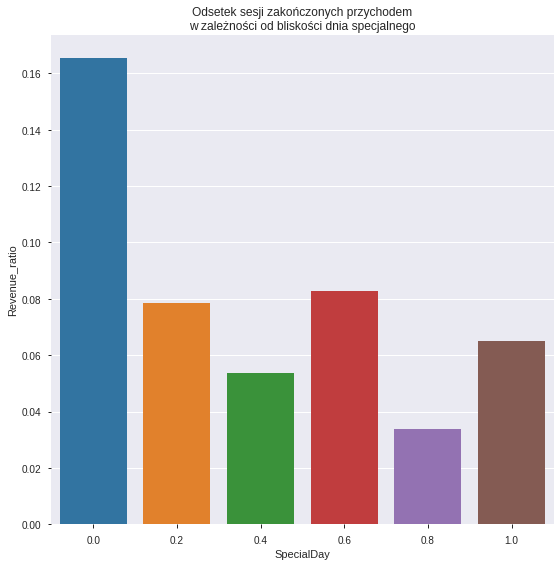

In [40]:
plotdata=data.loc[:, ['SpecialDay', 'Revenue']].groupby(['SpecialDay', 'Revenue']).size().reset_index(name='counts')
plotdata_sums=plotdata.loc[:, ['SpecialDay', 'counts']].groupby('SpecialDay').sum().reset_index().rename(columns={'counts':'sum'})
plotdata=plotdata.merge(plotdata_sums)
plotdata=plotdata[plotdata['Revenue']==True]
plotdata['Revenue_ratio']=plotdata['counts']/plotdata['sum']

fig, ax=plt.subplots(figsize=(9, 9))  
ax=sns.barplot(data=plotdata, x='SpecialDay', y='Revenue_ratio').set_title('Odsetek sesji zakończonych przychodem'+'\nw zależności od bliskości dnia specjalnego');
plt.show()

#### Komentarz

Co ciekawe, odsetek sesji zakończonych przychodem jest niższy w pobliżu dni specjalnych, w porównaniu do dni zwyczajnych.

### W jakich miesiącach odsetek sesji zakończonych przychodem jest największy?

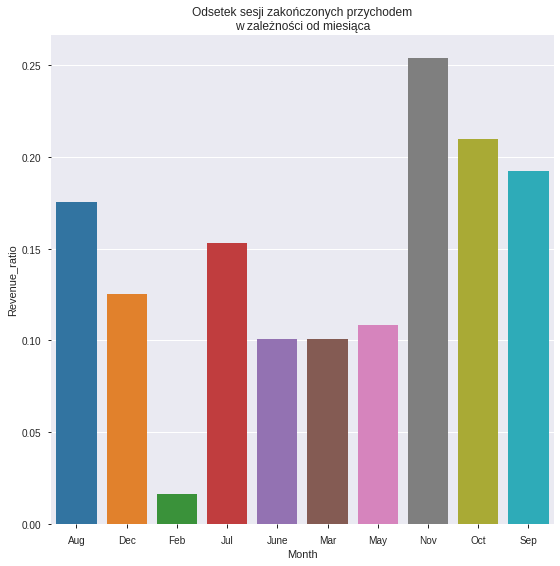

In [41]:
plotdata=data.loc[:, ['Month', 'Revenue']].groupby(['Month', 'Revenue']).size().reset_index(name='counts')
plotdata_sums=plotdata.loc[:, ['Month', 'counts']].groupby('Month').sum().reset_index().rename(columns={'counts':'sum'})
plotdata=plotdata.merge(plotdata_sums)
plotdata=plotdata[plotdata['Revenue']==True]
plotdata['Revenue_ratio']=plotdata['counts']/plotdata['sum']

fig, ax=plt.subplots(figsize=(9, 9))  
ax=sns.barplot(data=plotdata, x='Month', y='Revenue_ratio').set_title('Odsetek sesji zakończonych przychodem'+'\nw zależności od miesiąca');
plt.show()

#### Komentarz

Trzy najlepsze pod tym względem miesiące to listopad, październik i wrzesień. Luty mocno odstaje od reszty obserwacji, jako najgorszy miesiąc pod tym względem.